# Introduction to Clustering 

When we talk about clustering, we often talk about the concept of 'unsupervised learning' method, that also brings up the concept of ‘supervised learning’ method. 

When we talk about supervised machine learning, it is when there is a defined relationship between the independent and dependent variables of X and Y respectively. If it is for numerical inputs, it is regression and if it is for a class variable, then it is classification. 

However, data is never straightforward and there are often instances wherein there is no relationship between the each of the variables. During those instances, employing the un-supervised learning method is the best choice. Clustering, is an unsupervised learning technique that looks for data with no labels, and discovers clusters or groups when there is similarity between the data points. This helps in understanding the internal structure of the data and to understand the patterns within the dataset.  In the economic dataset, that contains the fiscal and monetary data of BRICS nations, clustering could be useful to understand if there are well-defining indicators that highlight the performance of each nation, let’s say in terms of GDP. For instance, if a set of features are clustering together, it means there are some features that are well-defined to those specific instances.  If certain variables are clustering, it means that maybe there is some sort of information that could be explored to ethically understand the contribution of factors. 



## K-Means Clustering 

K-means clustering is one of the unsupervised learning techniques that is used to group the data into distinct clusters without any fixed mapping between the dependant and the independent variables. The primary goal is to partition the dataset into K clusters (by choosing the optimal number of clusters) where each clusters is defined by the centroid. Since K-means uses Euclidean distance to define each cluster on basis of its centroid. For K-means, choosing the optimal number of clusters K is important to run for a range of K values whilst plotting the sum of squared distances between the data points and their centroids, if done through the elbow method. Another way to find optimal clusters is through the silhouette scores which is a metric that is used as an evaluation metrics for clustering. Ranging between -1 to 1, we try to use that score as a metric to find the optimal clustering size where each data point in the defined k range is computed taking into account the intra and inter cluster relationships and the average silhouette score is calculated and plotted. It is visualised using the scree plot to see how the values change with K.

Although K-means is computationally efficient for larger datasets, it assumed the circular clusters that are equally sized, that doesn’t really consider the complex data points. Another disadvantage is how the much of the performance of the model is dependent on k cluster values.

In [233]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

As my data consists of a self-defined variable X and Y, we see that for clustering, the dependant variable or Y variable has to be dropped. 

In [234]:
stackeddf= pd.read_csv("../data/stackeddf.csv")

stackeddf.head(10)
y = stackeddf['labels']
x = stackeddf.drop(['labels'], axis=1)
x1 = x.drop(['year'], axis=1)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x1)




### Optimal K-Means : Elbow Method 

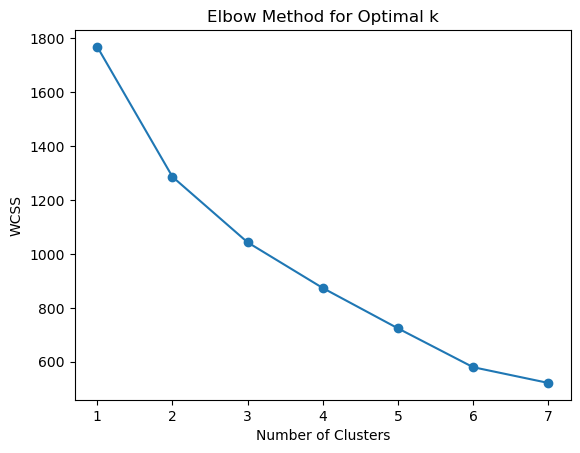

In [235]:
# to ignore future warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")


# optimal clustering using the elbow method
wcss = [] 
for i in range(1, 8): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.plot(range(1, 8), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()

In the code above, to avoid the warnings, the warnings module has been used. For k-means clustering, finding the optimal amount of clustering is important for better interpretability, higher performance and for informed decision making. The elbow method is used to find the optimal amount of clusters 'K'. It uses the WCSS (Within-Cluster Sum of Square), what is calculated using the distance between the points of the cluster centroid and the points of the cluster. So a loop has been created where for each value of k between 1 and 20, we calculate the WCSS amd plot it that resembles an Elbow. As the clusters increase, the WCSS value decreses. The optimal k value is the change in the shape of the point. The optimal amount of cluster here is 6. 

### Optimal K-Means : Silhoutte Score Method 

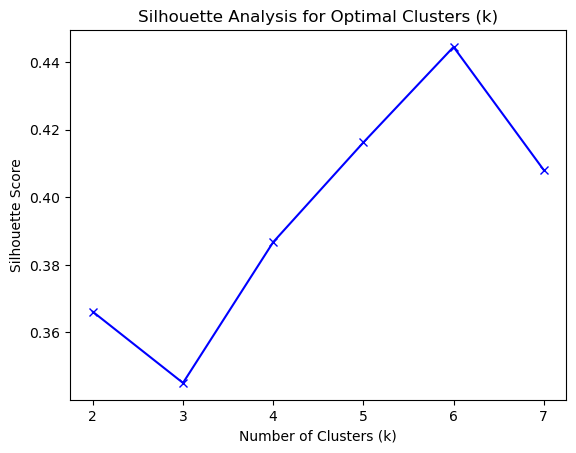

Optimal Number of Clusters: 6


In [260]:
# silhoutte score to find optimal k clusters

range_clusters = range(2, 8)

silhoutte = []

for n in range_clusters:
    kmeans = KMeans(n_clusters=n, random_state=2339)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    silhoutte.append(silhouette_score(x, cluster_labels))

# plotting
plt.plot(range_clusters, silhoutte, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters (k)')
plt.show()

optimal_clusters = range_clusters[np.argmax(silhoutte)]
print(f"Optimal Number of Clusters: {optimal_clusters}")

Finding the optimal k clusters can also be done through the silhouette score method that quantifies how similar the data point is within a cluster, referred to as 'cohesion' in comparison to the other clusters called 'separation'. 

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). In the code above, within the self-defined range of k, we calculate the silhouette scors for each iteration and try to find an optimal k that gives the maximum silhoutte scores. As it ranges between -1 and +1, a higher silhoutte scores' optimal cluster is chosen since it showcases more distinct and well-defined clusters space. Through this as well, we see that optimal k value is 6.

### Optimal K-Value Clustering 

#### Without Feature Extraction

In [257]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=2339)
optimal_kmeans = kmeans.fit_predict(x)
optimal_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 4, 4, 3, 3, 3, 4,
       3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 4, 4,
       3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4,
       3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 4, 5, 5, 0, 2, 5, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 4, 5, 5, 0, 2, 5, 0, 0],
      dtype=int32)

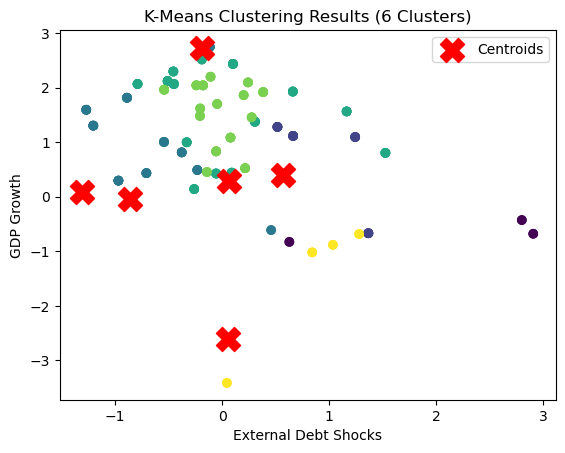

In [259]:

plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=optimal_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='X', c='red', label='Centroids')
plt.title('K-Means Clustering Results (6 Clusters)')
plt.xlabel('External Debt Shocks')
plt.ylabel('GDP Growth')
plt.legend()
plt.show()

One of my questions that I wanted to ask was about relationship between External Debt Shocks and the GDP growth. External debt shocks and GDP growth have a complex relationship that is influenced by debt levels, composition, and terms, as well as external factors and policy responses. High and unsustainable debt can stifle economic progress, and the mix of concessional and commercial loans influences the outcome. Debt terms, foreign shocks, and a country's policy reaction are all important considerations. Global economic conditions and country-specific factors such as governance and political stability add to the complexities of this relationship. Hence, one of the ways in which without the influence mapping between the dependant and independant variable, I wanted to find out relationship between External Debt Shocks and GDP Growth. It is seen that there is clustering where certain clusters being exclusive but most clusters overlapping and non-exclusive in nature. Two clusters are properly created, whereas the other two aren't. 


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


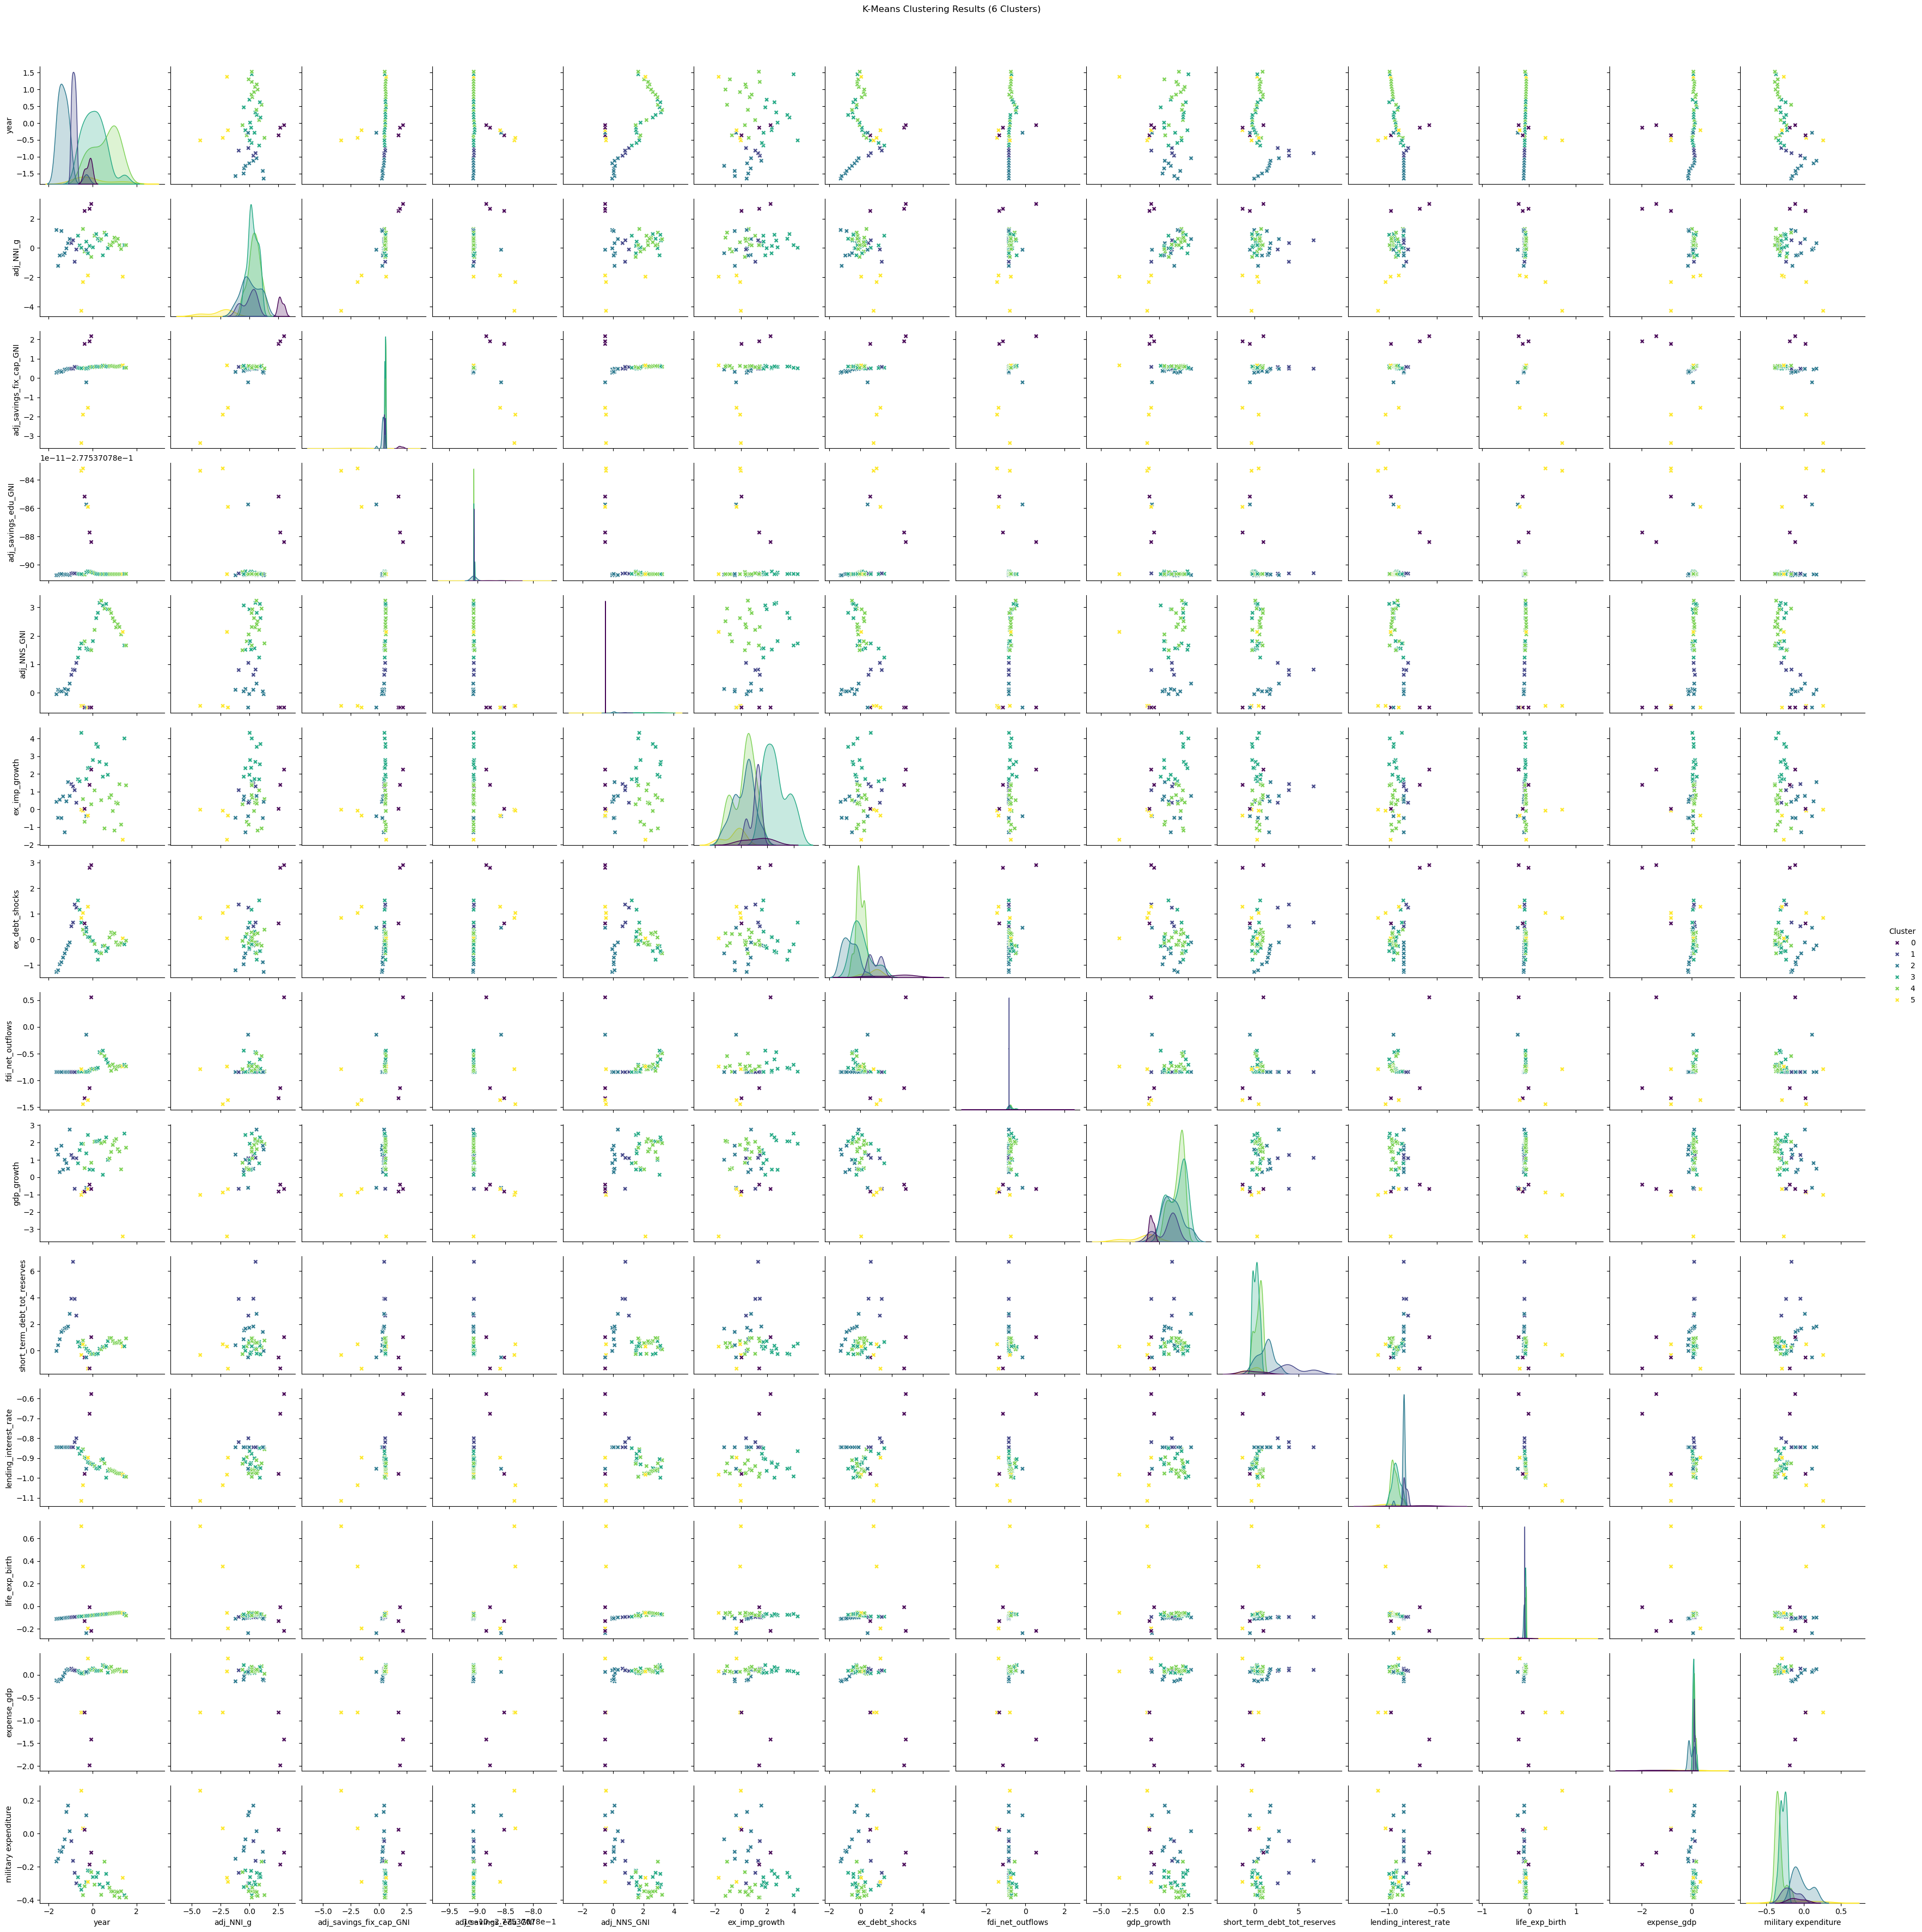

In [261]:

x['Cluster'] = optimal_kmeans

sns.pairplot(x, hue='Cluster', palette='viridis', markers='X')
plt.suptitle('K-Means Clustering Results (6 Clusters)', y=1.02)
plt.show()

If you look at the overall relationships of all the variables with one another, this also gives us an interesting plot to look at. 

### With Feature Extraction

Feature Extraction is one of the important components for well-defined and better performing clusters, hence an attempt is made to see if they actually help. PCA and t-SNE are both used to see if they capture the linear and non-linear aspects of the data well. 


In [240]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# before pca 

k_means_before = KMeans(n_clusters=6, random_state=42)
optimal_kmeans_before = k_means_before.fit_predict(x)

# after pca 
pca = PCA(n_components=4)
optimal_pca_kmeans = pca.fit_transform(x)

kmeans_after_pca = KMeans(n_clusters=6, random_state=42)
labels_after_pca = kmeans_after_pca.fit_predict(optimal_pca_kmeans)


# after tsne 

tsne = TSNE(n_components=3, perplexity=2, random_state=42)
optima_tsne_kmeans = tsne.fit_transform(x)

kmeans_after_tsne = KMeans(n_clusters=6, random_state=42)
labels_after_tsne = kmeans_after_pca.fit_predict(optima_tsne_kmeans)


silhouette_score_before_pca = silhouette_score(x, optimal_kmeans_before)
print(f"Silhouette Score before PCA: {silhouette_score_before_pca:.4f}")

silhouette_score_after_pca = silhouette_score(optimal_pca_kmeans, labels_after_pca)
print(f"Silhouette Score after PCA: {silhouette_score_after_pca:.4f}")

silhouette_score_after_tsne = silhouette_score(optima_tsne_kmeans, labels_after_tsne)
print(f"Silhouette Score after TSNE: {silhouette_score_after_tsne:.4f}")



Silhouette Score before PCA: 0.4454
Silhouette Score after PCA: 0.4803
Silhouette Score after TSNE: 0.2795


The silhouette score whilst doing the K-means clustering is better after PCA than before, thus capturing the dimensionality in the data and giving better clusters.

In [241]:

col = ('gdp_growth', 'ex_debt_shocks')
indices = [x.columns.get_loc(c) for c in col]
print(f"The indices of the columns {col} are: {indices}")


The indices of the columns ('gdp_growth', 'ex_debt_shocks') are: [8, 6]


I'm trying to find the indices so that I can compare the exact values for clustering before and after pca

In [242]:
evr = pca.explained_variance_ratio_
cev = np.cumsum(evr)

print("Explained Variance Ratio for Each Component:")
print(evr*100)


Explained Variance Ratio for Each Component:
[37.66203489 22.03607405 14.10907775  9.93647105]


We see that explained variance ratio is better for PCA 1 and PCA 2 for the dataset. 

/var/folders/cm/1bq_zvw92w99j_5d1p5jq5v40000gn/T/ipykernel_71191/353519608.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 3, 3)


Text(0, 0.5, 't-SNE Component 2')

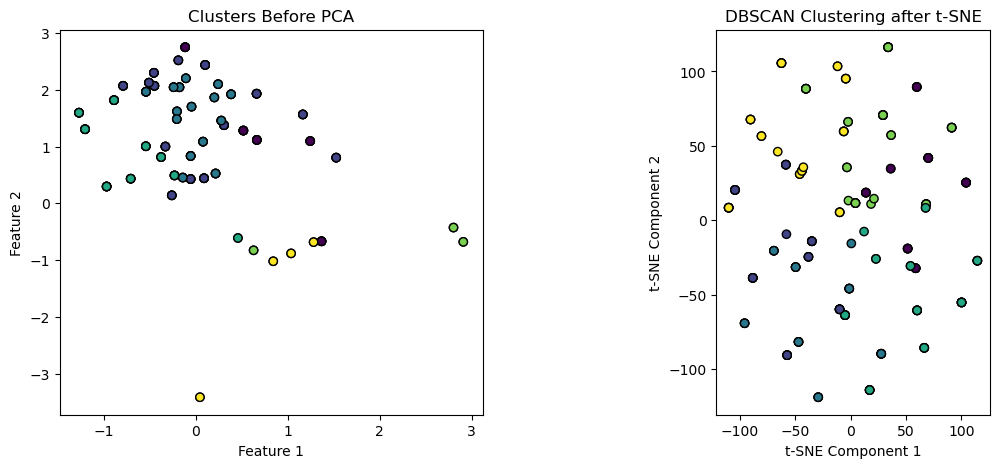

In [243]:
# Visualize clusters before PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=optimal_kmeans_before, cmap='viridis', edgecolor='k')
plt.title('Clusters Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualize clusters after PCA
plt.subplot(1, 2, 2)
plt.scatter(optimal_pca_kmeans[:, 0], optimal_pca_kmeans[:, 1], c=labels_after_pca, cmap='viridis', edgecolor='k')
plt.title('Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

ax = plt.subplot(1, 3, 3)
ax.scatter(optima_tsne_kmeans[:, 0], optima_tsne_kmeans[:, 1], c=labels_after_tsne, cmap='viridis', edgecolor='k')
ax.set_title('DBSCAN Clustering after t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')


Here, you can see that using PCA as a feature extraction method has made the clusters more pronounced. You can also see that there now, I can see the association between the GDP growth vs the external debt shocks. 

## DBSCAN

DBSCAN, also called as Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is one of the clustering algorithms that tries to look into the density of data points with specific radius to segregate the outliers, the outside and the inside points. There are three main points for DBSCAN, with core points, border points and the outliers.

1. Core points: The core points are those that have a defined number of minimum samples within a defined radius (referred to as epsilon)
2. Border points: The border points are those that are not core points but loiter somewhere around. 
3. Outliers: These points are those that are not core points, nor are they closer to the core points. They are often referred to as the noise.

For DBSCAN, the optimal performance is based on the epsilon value and the number of neighbours the clustering is looking for. Although unlike K-means, we don’t need to pre-specify the number of clusters but we need to find the optimal point. The silhouette score is a good method of evaluation. One of the methods that I have used is to iterate over all possible combinations of eps and min_samples values that gives me the maximum silhouette scores. 

One of the interesting parts that I liked about DBSCAN is how robust it is to outliers and can handle complex datasets but it is extremely sensitive to the choice of eps and min_sample values.


### Optimal Parameter Tuning

In [244]:
#for eps in [i/10 for i in range(4, 14)]:
    #for min_samples in range(4, 12):
        #print("\neps={}".format(eps))
        #print("min_samples={}".format(min_samples))
        
        # Apply DBSCAN
        #dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        #labels = dbscan.fit_predict(x)
        
        # Check if there is only one unique label
        #if len(np.unique(labels)) == 1:
            #print("Only one cluster found.")
        #else:
            # Calculate Silhouette Score
            #silh = silhouette_score(x, labels)

            # Print cluster information
            #print("Clusters present: {}".format(np.unique(labels)))
            #print("Cluster sizes: {}".format(np.bincount(labels + 1)))
            #print("Silhouette Score: {}".format(silh*100))

This is the code I had worked on during one of the customer segmentation projects from real life KPMG dataset that tries to segment customers on basis of their consumption patterns during the RFM analysis. Within a defined range of parameters (eps and minimum samples), it find the optimal values that give the best solution. In this, we see that, with eps of 1.2 and minimum samples of 4, the silhouette score is around 53%.

### Optimal DBSCAN Clustering 

In [245]:
dbscan_optimal = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan = dbscan_optimal.fit_predict(scaled_data)

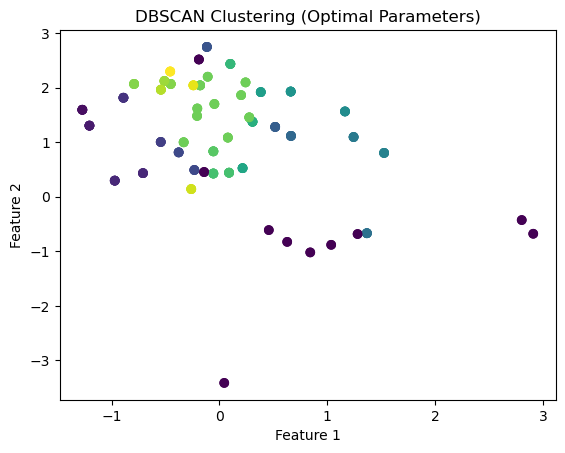

,year,adj_NNI_g,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,ex_imp_growth,ex_debt_shocks,fdi_net_outflows,gdp_growth,short_term_debt_tot_reserves,lending_interest_rate,life_exp_birth,expense_gdp,military expenditure,Cluster
0,-1.647859,1.230366,0.270892,-0.277537,-0.052004,0.419580,-1.270470,-0.842531,1.595002,-0.032164,-0.845342,-0.112698,-0.121526,-0.167829,2
1,-1.572340,-1.216110,0.313510,-0.277537,0.103127,-0.481153,-1.204634,-0.842808,1.304262,0.403253,-0.845342,-0.110878,-0.141348,-0.151690,2
2,-1.496821,-0.510146,0.367195,-0.277537,0.049534,0.536099,-0.969857,-0.842942,0.295912,0.851964,-0.845342,-0.109081,-0.105898,-0.102821,2
3,-1.421301,1.160350,0.316780,-0.277537,0.046547,-0.495731,-0.889487,-0.842495,1.815392,1.403674,-0.845342,-0.107310,-0.098738,-0.109603,2
4,-1.345782,-0.472199,0.362786,-0.277537,0.058430,0.726138,-0.708319,-0.842596,0.433390,1.517825,-0.845342,-0.105584,-0.034063,-0.080748,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.364032,2.527897,1.759849,-0.277537,-0.518910,0.024080,0.628001,-1.331112,-0.826727,-0.526985,-0.979266,-0.131598,-0.824782,0.023742,0
191,-0.288513,-0.118473,-0.224029,-0.277537,-0.518910,-0.390300,0.457744,-0.144805,-0.610388,-0.518753,-0.953380,-0.238025,0.064149,0.110872,2
192,-0.212994,-1.870050,-1.539088,-0.277537,-0.518910,-0.355711,1.280590,-1.366720,-0.683008,-1.369414,-0.897663,-0.196331,0.358975,-0.291221,4
193,-0.137474,2.674116,1.894557,-0.277537,-0.518732,1.376085,2.801555,-1.142294,-0.426718,-1.350293,-0.677325,-0.009030,-1.982792,-0.186438,0


In [246]:
plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=labels_optimal_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering (Optimal Parameters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### With Feature Extraction

In [247]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing this for 3D scatter plot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Before PCA
dbscan_optimal = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan = dbscan_optimal.fit_predict(x)

# After PCA
pca1 = PCA(n_components=4)
optimal_pca_kmeans1 = pca1.fit_transform(x)

dbscan_optimal_after_pca = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan_pca = dbscan_optimal_after_pca.fit_predict(optimal_pca_kmeans1)

# After t-SNE
tsne = TSNE(n_components=3, perplexity=2, random_state=42)
optima_tsne_kmeans2 = tsne.fit_transform(scaled_data)

dbscan_optimal_after_tsne = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan_tsne = dbscan_optimal_after_tsne.fit_predict(optima_tsne_kmeans2)


In [248]:

# Silhouette scores
silhouette_score_before_pca = silhouette_score(scaled_data, labels_optimal_dbscan)
print(f"Silhouette Score before PCA: {silhouette_score_before_pca:.4f}")

silhouette_score_after_pca = silhouette_score(optimal_pca_kmeans1, labels_optimal_dbscan_pca)
print(f"Silhouette Score after PCA: {silhouette_score_after_pca:.4f}")

silhouette_score_after_tsne = silhouette_score(optima_tsne_kmeans2, labels_optimal_dbscan_tsne)
print(f"Silhouette Score after TSNE: {silhouette_score_after_tsne:.4f}")



Silhouette Score before PCA: 0.5285
Silhouette Score after PCA: 0.5121
Silhouette Score after TSNE: 0.5379


In [249]:
evr1 = pca1.explained_variance_ratio_
print("Explained Variance Ratio for Each Component:")
print(evr1*100)

x.columns

Explained Variance Ratio for Each Component:
[37.66203489 22.03607405 14.10907775  9.93647105]


Index(['year', 'adj_NNI_g', 'adj_savings_fix_cap_GNI', 'adj_savings_edu_GNI',
       'adj_NNS_GNI', 'ex_imp_growth', 'ex_debt_shocks', 'fdi_net_outflows',
       'gdp_growth', 'short_term_debt_tot_reserves', 'lending_interest_rate',
       'life_exp_birth', 'expense_gdp', 'military expenditure', 'Cluster'],
      dtype='object')

Again PCA1 and PCA2 attempt to capture the maximum variance of the dataset in comparison

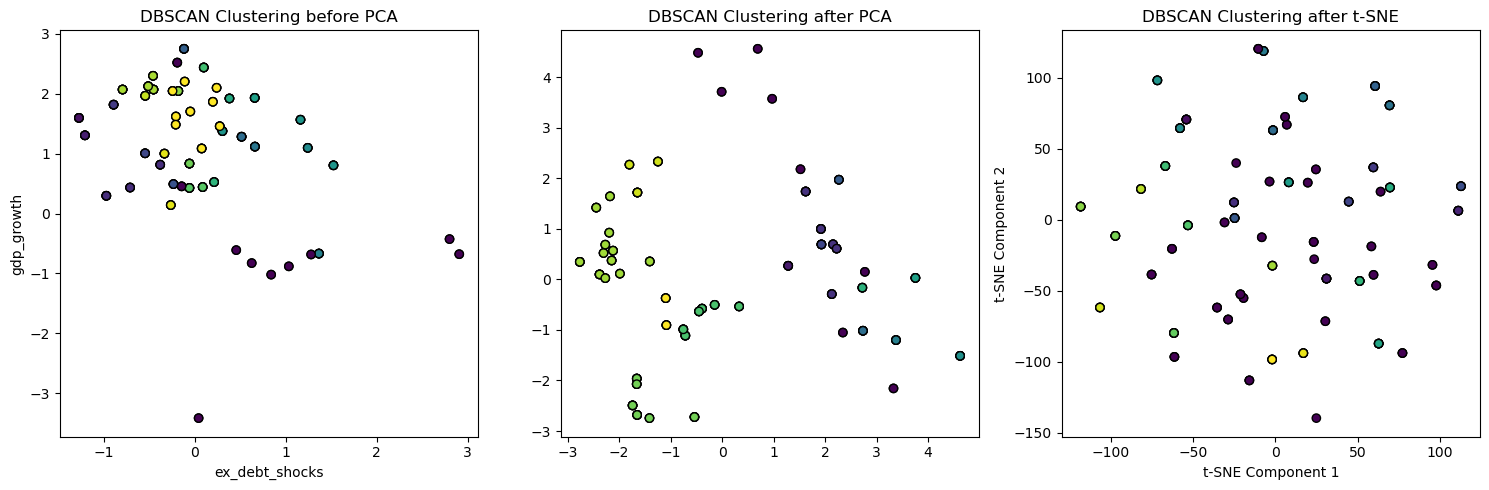

In [250]:
# Visualization
plt.figure(figsize=(15, 5))

# Before PCA
plt.subplot(1, 3, 1)
plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=labels_optimal_dbscan, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering before PCA')
plt.xlabel('ex_debt_shocks')
plt.ylabel('gdp_growth')

# After PCA
plt.subplot(1, 3, 2)
plt.scatter(optimal_pca_kmeans1[:, 0], optimal_pca_kmeans1[:, 1], c=labels_optimal_dbscan_pca, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering after PCA')

# After t-SNE
ax = plt.subplot(1, 3, 3)
ax.scatter(optima_tsne_kmeans2[:, 0], optima_tsne_kmeans2[:, 1], c=labels_optimal_dbscan_tsne, cmap='viridis', edgecolor='k')
ax.set_title('DBSCAN Clustering after t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


If we try to look at the dataset, although the silhouette scores is more for TSNE but if you look at the clusters, you see the clustering is better for DBSCAN after PCA but in terms of Silhouette scores, the answer is different. 

## Hierarchial Clustering 

The hierarchical clustering creates a tree of clusters as a dendrogram, that is hierarchical in nature to represent the relationships between the data points in depth. This is a helpful clustering technique as we can rely on visualisation to make sense of the clusters. For hierarchical clustering usually, each point is initially assumed to be a single and independent cluster. Based on the linkage method, the closest clusters are merged together (we used Ward) and on basis of that the dendrogram is formed until a specified number of clusters is reached. 

The optimal choice for the clusters is a trial and error on basis of what is preferred by the person. For the project, the a bigger cluster size was defined and was pre-defined according to the requirements. 

One of the hierarchical clustering techniques that I have done is the Agglomerative clustering that follows a bottoms-up approach to build a hierarchy of clusters that follows the exact method of hierarchical clustering. 


### Finding optimal clusters 

- talk about how when you want to find the optimal clusters, you can look into the dendogram and just do it. 
- 

Text(0, 0.5, 'Distance')

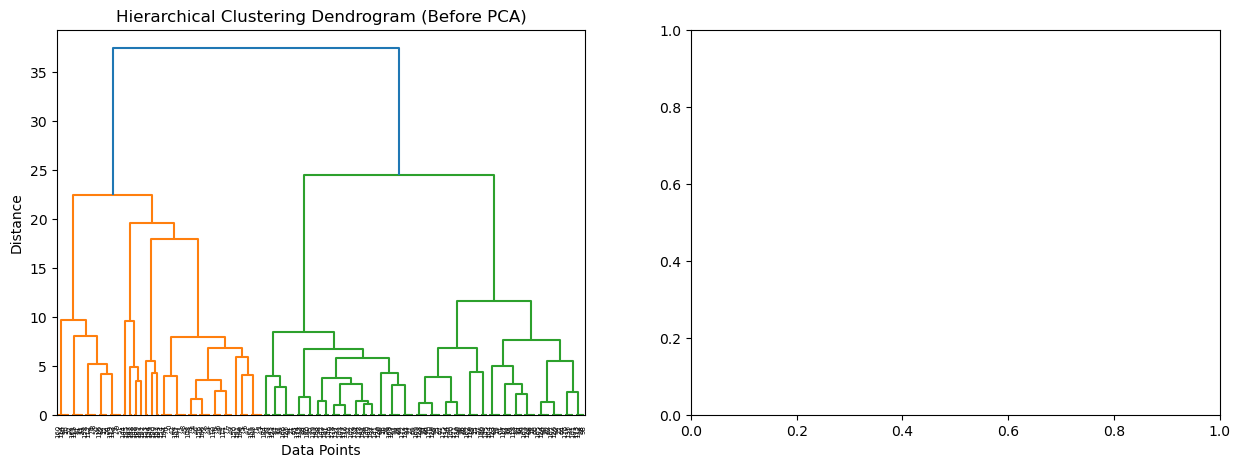

In [251]:
# for agglomerative clustering 

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(x, method='ward')
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Dendrogram (Before PCA)
dendrogram(linkage_matrix, ax=axes[0])
axes[0].set_title('Hierarchical Clustering Dendrogram (Before PCA)')
axes[0].set_xlabel('Data Points')
axes[0].set_ylabel('Distance')

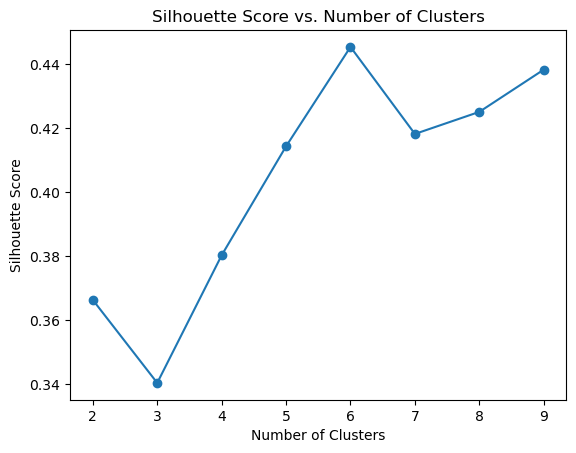

In [252]:
# Silhouette Score
max_clusters = 9
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(x)
    silhouette_scores.append(silhouette_score(x, labels))

# Plot the silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

We know that the agglomerative clusters is around 6, when the silhouette score is around 0.44. Now we try to do clustering on basis of before and after both the feature extraction methods of t-SNE and PCA. 

In [253]:

# Before PCA
hierarchial_optimal = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_hierarcial = hierarchial_optimal.fit_predict(x)

# After PCA
pca2 = PCA(n_components=4)
optimal_pca_kmeans2 = pca2.fit_transform(x)

hierarchal_optimal_after_pca = AgglomerativeClustering(n_clusters=6)
labels_optimal_hierarchal_pca = hierarchal_optimal_after_pca.fit_predict(optimal_pca_kmeans2)

# After t-SNE
tsne2 = TSNE(n_components=3, perplexity=2, random_state=42)
optima_tsne_hierarchial = tsne.fit_transform(x)

hierarchal_optimal_after_tsne = AgglomerativeClustering(n_clusters=6)
labels_optimal_hierarchal_tsne = hierarchal_optimal_after_pca.fit_predict(optima_tsne_hierarchial)


In [254]:
# Silhouette scores
silhouette_score_before_pca1 = silhouette_score(x, labels_optimal_hierarcial)
print(f"Silhouette Score before PCA: {silhouette_score_before_pca:.4f}")

silhouette_score_after_pca1 = silhouette_score(optimal_pca_kmeans2, labels_optimal_hierarchal_pca)
print(f"Silhouette Score after PCA: {silhouette_score_after_pca:.4f}")

silhouette_score_after_tsne1 = silhouette_score(optima_tsne_hierarchial, labels_optimal_hierarchal_tsne)
print(f"Silhouette Score after TSNE: {silhouette_score_after_tsne:.4f}")


Silhouette Score before PCA: 0.5285
Silhouette Score after PCA: 0.5121
Silhouette Score after TSNE: 0.5379


Here again, we see that Silhouette Score after t-SNE performs better. We shall have to check it through visualization. 

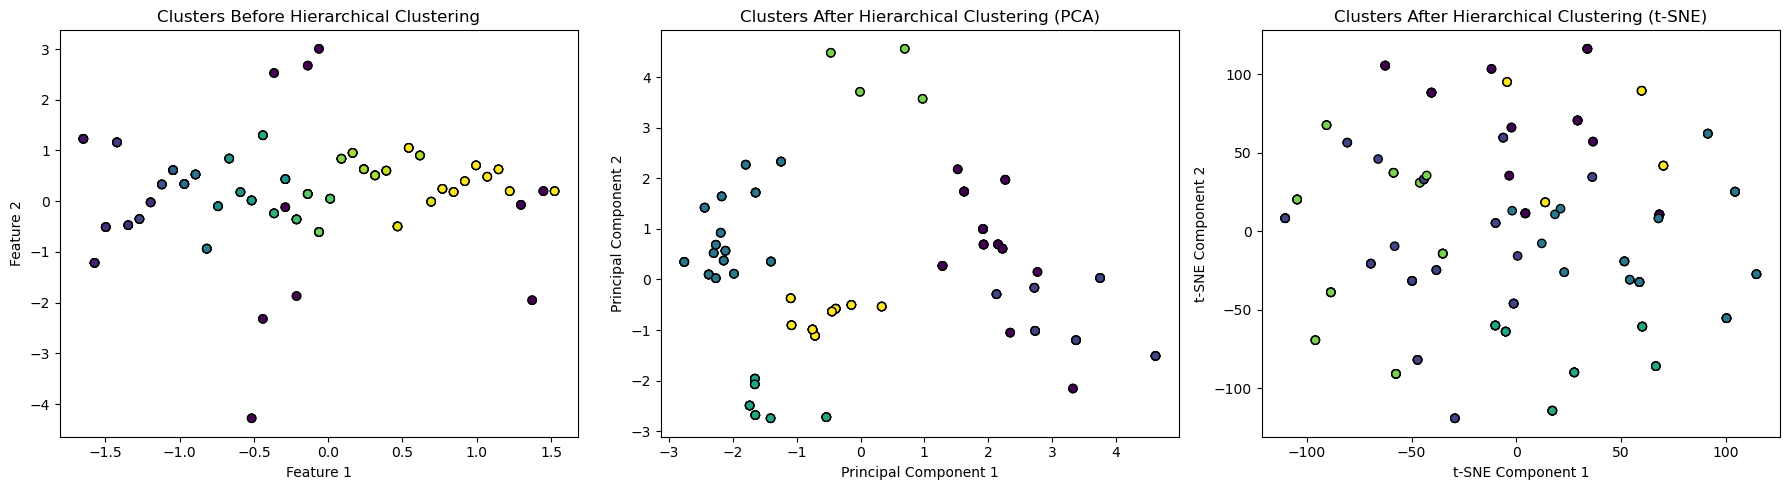

In [255]:
# Visualize clusters before hierarchical clustering
plt.figure(figsize=(18, 5))

# Before Hierarchical Clustering
plt.subplot(1, 3, 1)
plt.scatter(x.values[:, 0], x.values[:, 1], c=labels_optimal_hierarcial, cmap='viridis', edgecolor='k')
plt.title('Clusters Before Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# After Hierarchical Clustering with PCA
plt.subplot(1, 3, 2)
plt.scatter(optimal_pca_kmeans2[:, 0], optimal_pca_kmeans2[:, 1], c=labels_optimal_hierarchal_pca, cmap='viridis', edgecolor='k')
plt.title('Clusters After Hierarchical Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# After Hierarchical Clustering with t-SNE
plt.subplot(1, 3, 3)
plt.scatter(optima_tsne_hierarchial[:, 0], optima_tsne_hierarchial[:, 1], c=labels_optimal_hierarchal_tsne, cmap='viridis', edgecolor='k')
plt.title('Clusters After Hierarchical Clustering (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

When you look at hierarchial clustering, using the agglomerative clustering technique, we see that the clustering after PCA is better as you can see well-defined clusters that are not overlapping one another. You see that the clustering is better after the PCA as the best feature set is used to compare the dataset. 

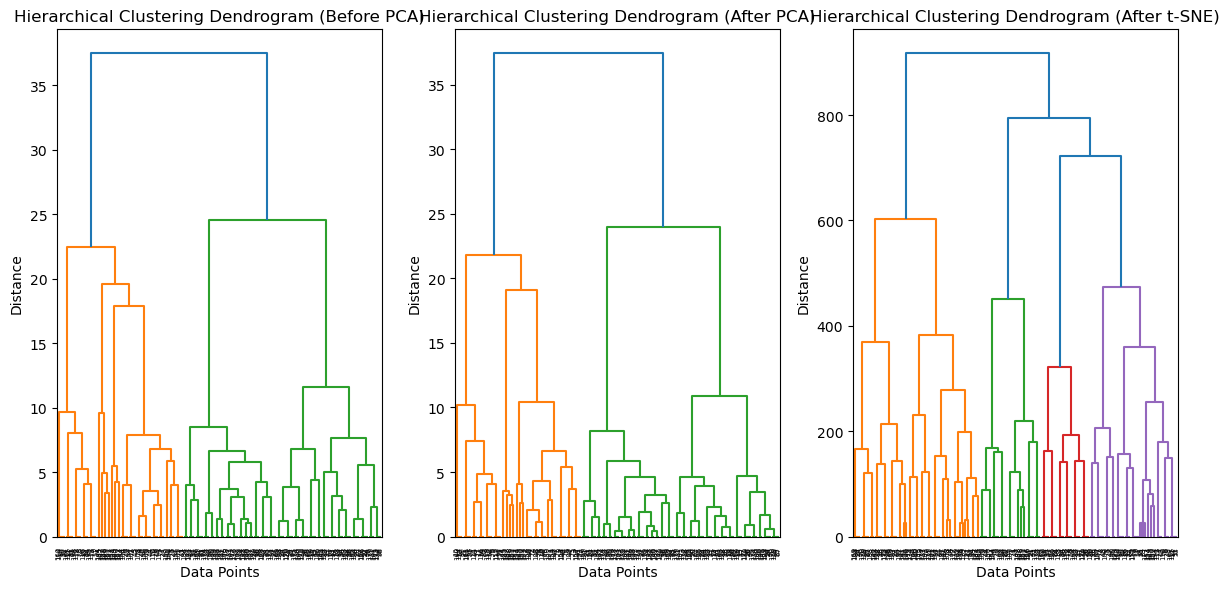

In [256]:
# Create subplots for before and after PCA
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Dendrogram before PCA
dendrogram(linkage(x, method='ward'), ax=axes[0])
axes[0].set_title('Hierarchical Clustering Dendrogram (Before PCA)')
axes[0].set_xlabel('Data Points')
axes[0].set_ylabel('Distance')

# Dendrogram after PCA
dendrogram(linkage(optimal_pca_kmeans2, method='ward'), ax=axes[1])
axes[1].set_title('Hierarchical Clustering Dendrogram (After PCA)')
axes[1].set_xlabel('Data Points')
axes[1].set_ylabel('Distance')

# Dendrogram after PCA
dendrogram(linkage(optima_tsne_hierarchial, method='ward'), ax=axes[2])
axes[2].set_title('Hierarchical Clustering Dendrogram (After t-SNE)')
axes[2].set_xlabel('Data Points')
axes[2].set_ylabel('Distance')

plt.tight_layout()
plt.show()

## Sources 

clustering 

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20value%20of%20the%20silhouette,near%200%20denote%20overlapping%20clusters.

